In [1]:
#Importing libraries
import warnings
warnings.filterwarnings("ignore")

In [37]:
import keras
from keras.datasets import cifar10

from keras.models import Sequential
import matplotlib.pyplot as plt

from pathlib import Path
from matplotlib import pyplot
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
#Creating result directory
results_dir = Path('/Users/somashekarvayuvegula/Documents/Workspace/Big_Data/assignment06_Vayuvegula_SomaShekar/').joinpath('results')
results_dir.mkdir(parents=True, exist_ok=True)

# Assignment 6.2a

## Load dataset

In [4]:
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

In [5]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [6]:
x_train = x_train.astype('float32')
x_train /= 255
x_test = x_test.astype('float32')
x_test /= 255
x_val_train = x_train[:10000]
x_train = x_train[10000:]
#Convert target data to single array of shape (50000,) and (10000,)
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])
y_val_train = y_train[:10000]
y_train = y_train[10000:]

In [7]:
#Build model

from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Dense, Flatten
model = Sequential()
model.add(Conv2D(32, (3, 3), 
                 padding='same', 
                 input_shape=x_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [8]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['acc'])

In [9]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size=128, 
                    epochs = 100, 
                    validation_data=(x_val_train, y_val_train), 
                    verbose=False)

In [10]:
# Evaluate the model
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 19s 61ms/step - loss: 1.1274 - acc: 0.6753
[1.1273853778839111, 0.6753000020980835]


In [11]:
history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

In [12]:
# Saving Model files to results folder
result_model_file = results_dir.joinpath('Assignment_6.2a_model.h5')
model.save(result_model_file)
print('Saved 6.2a trained model to results folder')

Saved 6.2a trained model to results folder


## Plotting metrics

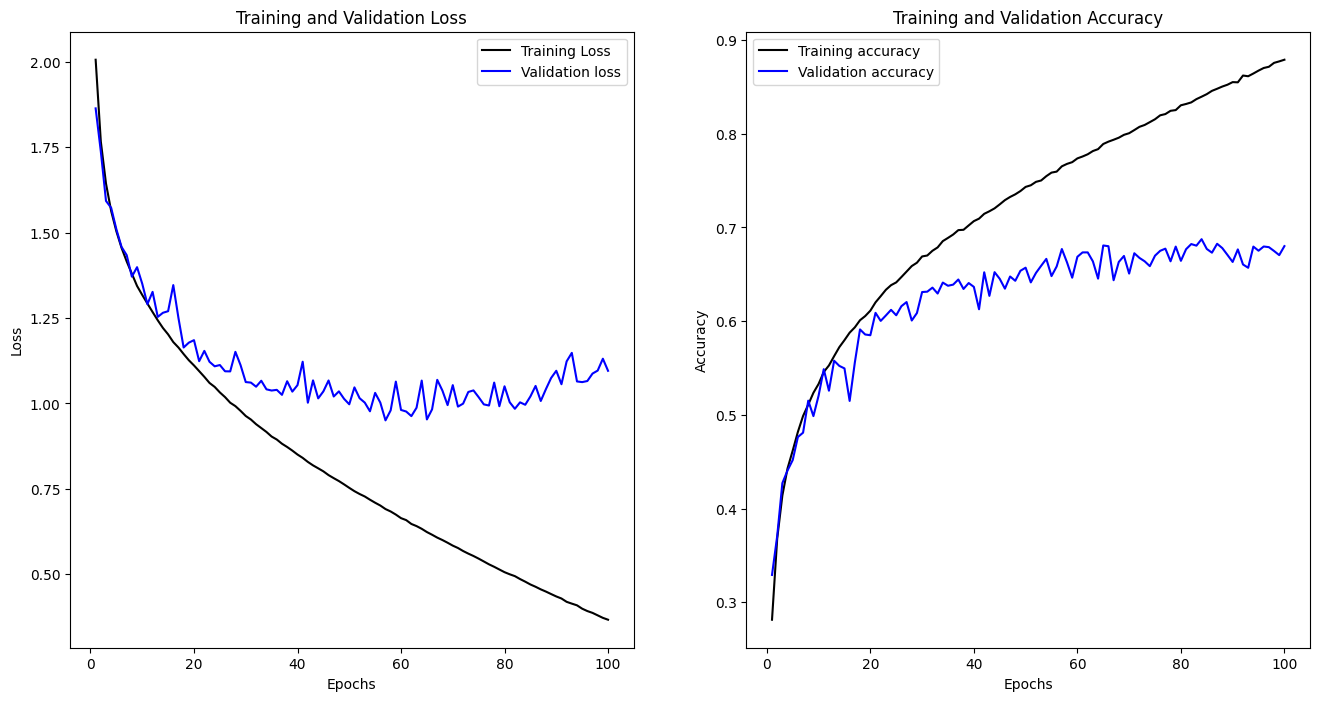

In [13]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(16,8))

ax1.plot(epochs, loss_values,  'k', label = 'Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epochs, acc,  'k', label = 'Training accuracy')
ax2.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()
img_file = results_dir.joinpath('Assignment_6.2a_Training_and_Validation_Loss_Accuracy.png')
plt.savefig(img_file)
plt.show()


# Assignment 6.2b

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                      

In [16]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['acc'])

In [17]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train)

history = model.fit(datagen.flow(x_train, 
                                 y_train,
                                 batch_size=128),
                    epochs=100,
                    validation_data=(x_val_train, y_val_train),
                    workers=4, 
                    verbose=False)

In [18]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 4320s 14s/step - loss: 0.9236 - acc: 0.6788
[0.9235966801643372, 0.6787999868392944]


In [19]:
history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

In [20]:
# Saving Model files to results folder
result_model_file = results_dir.joinpath('Assignment_6.2b_model.h5')
model.save(result_model_file)
print('Saved 6.2b trained model to results folder')

Saved 6.2b trained model to results folder


## Plotting metrics

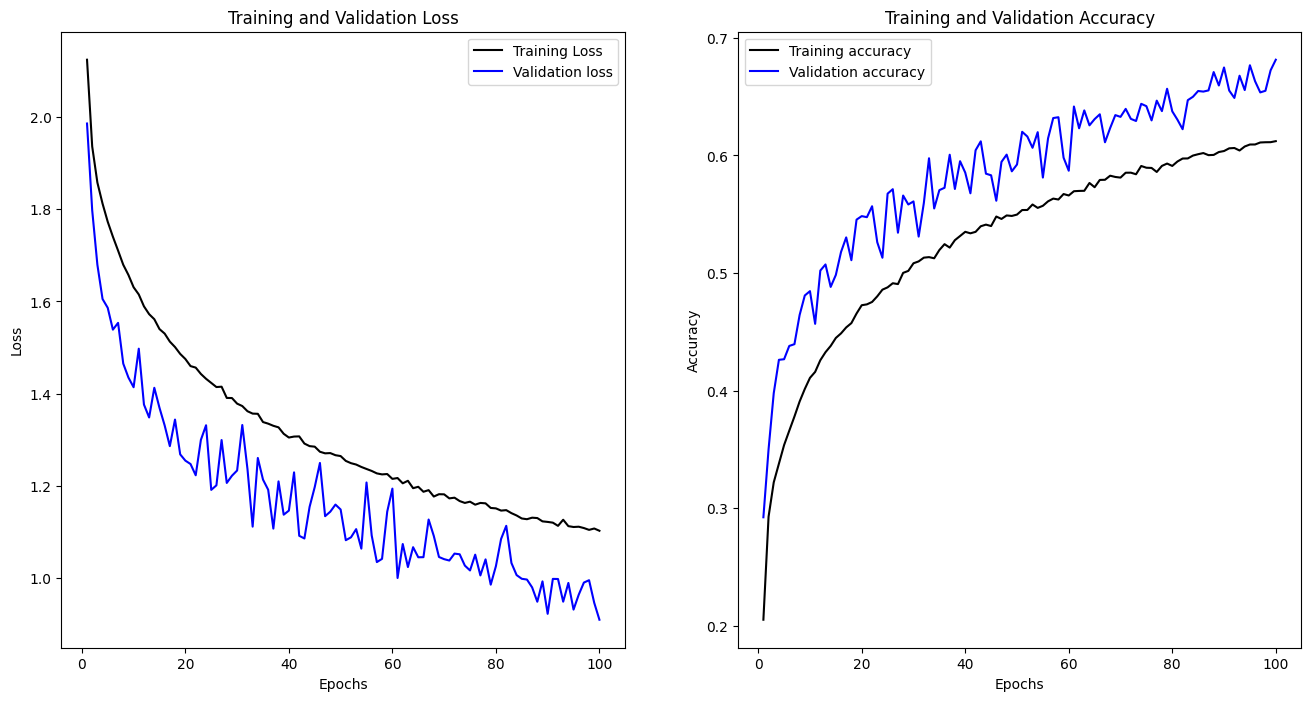

In [21]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(16,8))

ax1.plot(epochs, loss_values,  'k', label = 'Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epochs, acc,  'k', label = 'Training accuracy')
ax2.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()
img_file = results_dir.joinpath('Assignment_6.2b_Training_and_Validation_Loss_Accuracy.png')
plt.savefig(img_file)
plt.show()